In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.preprocessing import scale 

### 1.importing data

In [43]:
data = pd.read_csv("wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### 2.1 getting data ready

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [45]:
data['Type'].unique()

array([1, 2, 3], dtype=int64)

### 2.2 detecting outliers

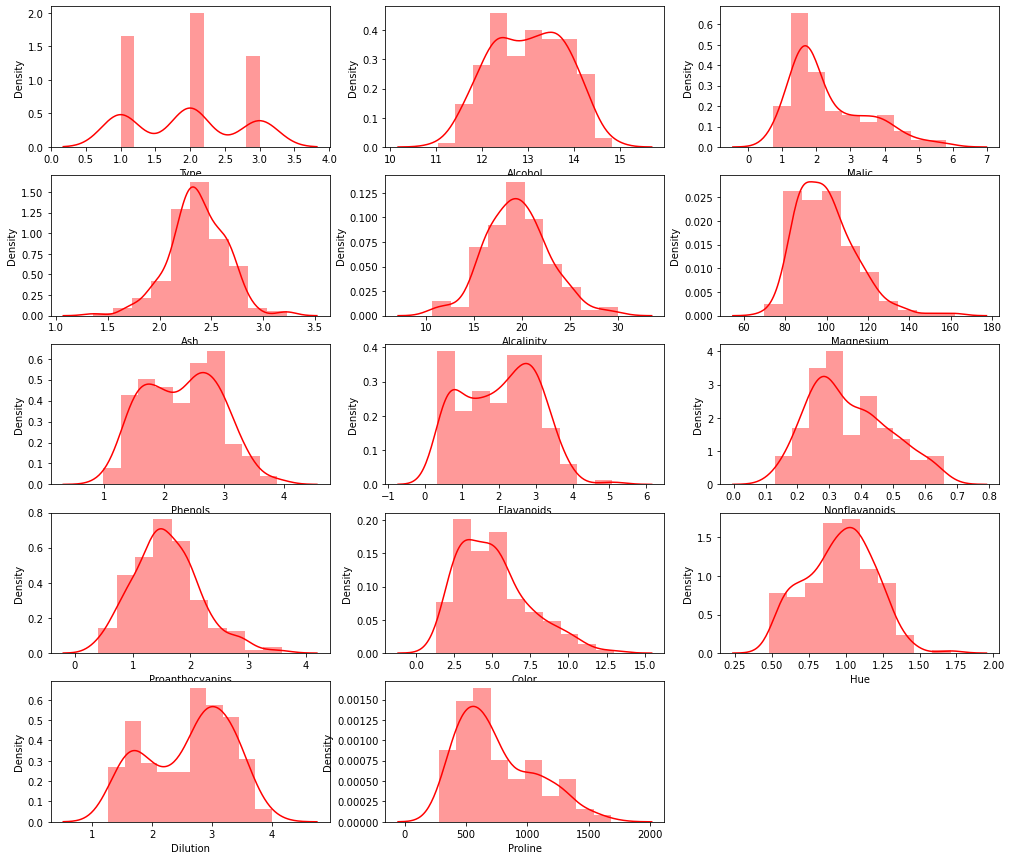

In [46]:
import seaborn as sns

plt.figure(figsize=(17,15)) 

plt.subplot(5,3,1)
sns.distplot(data['Type'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,2)
sns.distplot(data['Alcohol'],bins=10,  kde = True, color =  'red' )
plt.subplot(5,3,3)
sns.distplot(data['Malic'],bins=10,  kde = True, color =  'red' )    
plt.subplot(5,3,4)
sns.distplot(data['Ash'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,5)
sns.distplot(data['Alcalinity'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,6)
sns.distplot(data['Magnesium'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,7)
sns.distplot(data['Phenols'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,8)
sns.distplot(data['Flavanoids'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,9)
sns.distplot(data['Nonflavanoids'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,10)
sns.distplot(data['Proanthocyanins'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,11)
sns.distplot(data['Color'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,12)
sns.distplot(data['Hue'],bins=10,  kde = True, color =  'red' ) 
plt.subplot(5,3,13)
sns.distplot(data['Dilution'],bins=10,  kde = True, color =  'red' ) 
plt.subplot(5,3,14)
sns.distplot(data['Proline'],bins=10,  kde = True, color =  'red' ) 

plt.show()

#for perfectly skewed N.D. kurtosis = 3

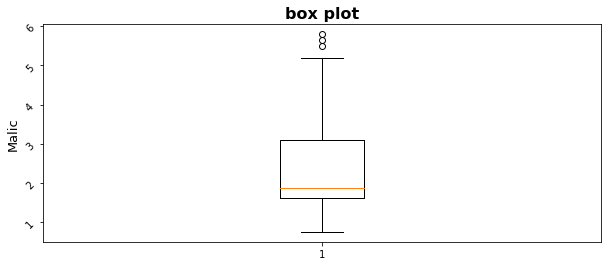

[array([1.6025, 0.74  ]), array([3.0825, 5.19  ])]

In [47]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("Malic", fontsize = 13 )                                           #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


#box=plt.boxplot(x='Alcohol', data=data)                                               
box=plt.boxplot(x='Malic', data=data)
#box=plt.boxplot(x='Ash', data=data)
#box=plt.boxplot(x='Alcalinity', data=data)
#box=plt.boxplot(x='Magnesium', data=data)
#box=plt.boxplot(x='Phenols', data=data)
#box=plt.boxplot(x='Flavanoids', data=data)
#box=plt.boxplot(x='Nonflavanoids', data=data)
#box=plt.boxplot(x='Proanthocyanins', data=data)
#box=plt.boxplot(x='Color', data=data)
#box=plt.boxplot(x='Hue', data=data)
#box=plt.boxplot(x='Dilution', data=data)
#box=plt.boxplot(x='Proline', data=data)

plt.show() 


[item.get_ydata() for item in box['whiskers']]



In [48]:
# print(np.where(data['Malic']>5.19))                               #3 outliers
# print(np.where(data['Ash']>2.92))                                 #2 outliers
# print(np.where(data['Ash']<1.7))                                  #1 outliers
# print(np.where(data['Alcalinity']>27))                            #3 outliers
# print(np.where(data['Alcalinity']<11.2))                          #1 outliers
# print(np.where(data['Magnesium']>134))                            #4 outliers
# print(np.where(data['Proanthocyanins']>2.96))                     #2 outliers
# print(np.where(data['Color']>10.52))                              #4 outliers
# print(np.where(data['Hue']>1.45))                                 #4 outliers


#don't delete the record becoz of outliers ;
#also we don't want to have outliers
#so we replace these with median or mode or we can do quantile based flooring and capping

In [49]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [50]:
# Computing 90th percentile and replacing the outliers with 90th percentile
p_90 = np.percentile(data['Malic'], 90)
data.loc[data.Malic > p_90, 'Malic'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Ash'], 90)
data.loc[data.Ash > p_90, 'Ash'] = np.nan
data.fillna(p_90,inplace=True)
p_10 = np.percentile(data['Ash'], 10)
data.loc[data.Ash < p_10, 'Ash'] = np.nan
data.fillna(p_10,inplace=True)
p_10 = np.percentile(data['Alcalinity'], 10)
data.loc[data.Alcalinity < p_10, 'Alcalinity'] = np.nan
data.fillna(p_10,inplace=True)
p_90 = np.percentile(data['Alcalinity'], 90)
data.loc[data.Alcalinity > p_90, 'Alcalinity'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Magnesium'], 90)
data.loc[data.Magnesium > p_90, 'Magnesium'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Proanthocyanins'], 90)
data.loc[data.Proanthocyanins > p_90, 'Proanthocyanins'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Color'], 90)
data.loc[data.Color > p_90, 'Color'] = np.nan
data.fillna(p_90,inplace=True)
p_90 = np.percentile(data['Hue'], 90)
data.loc[data.Hue > p_90, 'Hue'] = np.nan
data.fillna(p_90,inplace=True)


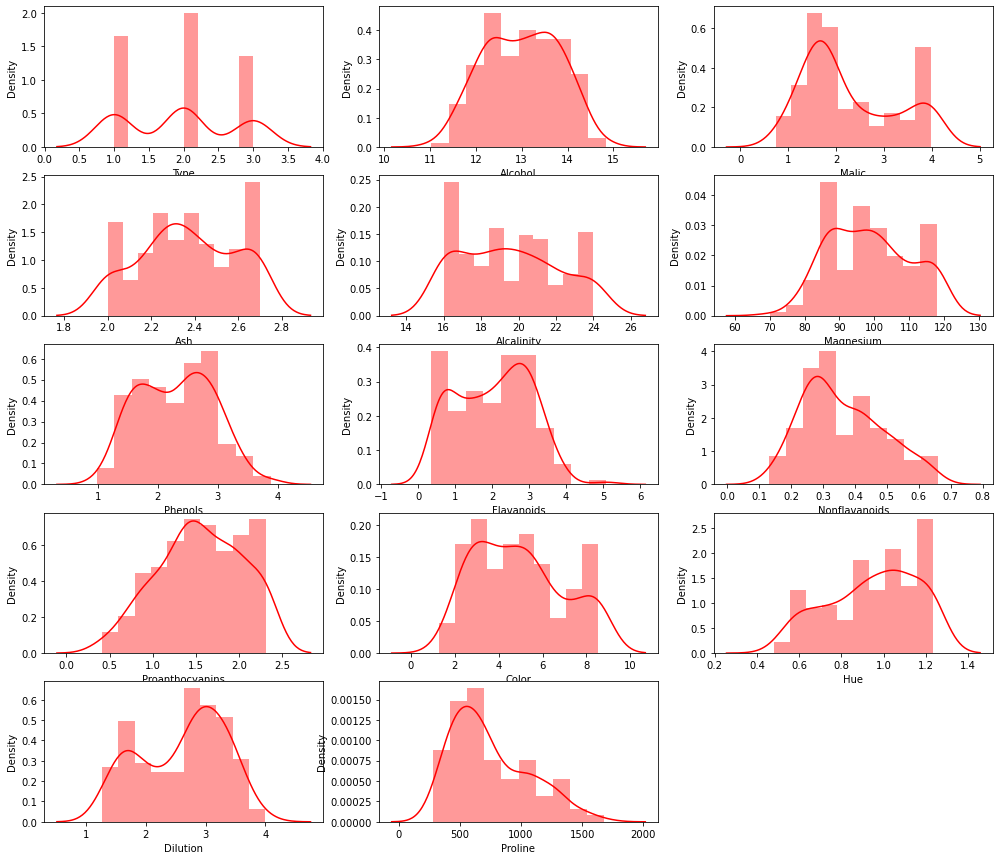

In [51]:
import seaborn as sns

plt.figure(figsize=(17,15)) 

plt.subplot(5,3,1)
sns.distplot(data['Type'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,2)
sns.distplot(data['Alcohol'],bins=10,  kde = True, color =  'red' )
plt.subplot(5,3,3)
sns.distplot(data['Malic'],bins=10,  kde = True, color =  'red' )    
plt.subplot(5,3,4)
sns.distplot(data['Ash'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,5)
sns.distplot(data['Alcalinity'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,6)
sns.distplot(data['Magnesium'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,7)
sns.distplot(data['Phenols'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,8)
sns.distplot(data['Flavanoids'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,9)
sns.distplot(data['Nonflavanoids'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,10)
sns.distplot(data['Proanthocyanins'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,11)
sns.distplot(data['Color'],bins=10,  kde = True, color =  'red' )      
plt.subplot(5,3,12)
sns.distplot(data['Hue'],bins=10,  kde = True, color =  'red' ) 
plt.subplot(5,3,13)
sns.distplot(data['Dilution'],bins=10,  kde = True, color =  'red' ) 
plt.subplot(5,3,14)
sns.distplot(data['Proline'],bins=10,  kde = True, color =  'red' ) 

plt.show()

#for perfectly skewed N.D. kurtosis = 3

### 2.3 Scaling of data

In [60]:
#we should normalize or standardize our data ?

# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


#### a) standardization of data

In [61]:
# standardization of data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_s=pd.DataFrame(x_scaled)
data_s.columns=['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']

data_s = pd.concat([data['Type'],data_s],axis=1)
data_s.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,1.518613,-0.577683,0.278439,-1.352641,1.665802,0.808997,1.034819,-0.659563,1.518973,0.357986,0.439501,1.847920,1.013009
1,1,0.246290,-0.505112,-1.049936,-1.352641,0.117882,0.568648,0.733629,-0.820719,-0.553748,-0.268294,0.487058,1.113449,0.965242
2,1,0.196879,0.096195,1.377784,-0.356457,0.203877,0.808997,1.215533,-0.498407,1.549756,0.377868,0.391944,0.788587,1.395148
3,1,1.691550,-0.328867,0.599081,-1.046122,1.235824,2.491446,1.466525,-0.981875,1.293231,1.431608,-0.416524,1.184071,2.334574
4,1,0.295700,0.334644,1.515202,0.563098,1.665802,0.808997,0.663351,0.226796,0.554439,-0.298117,0.439501,0.449601,-0.037874


#### b) normalisation of data

In [62]:
# Normalization of data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data.iloc[:,1:])
data_n=pd.DataFrame(x_scaled)
data_n.columns=['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']

data_n = pd.concat([data['Type'],data_n],axis=1)
data_n.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,0.842105,0.299106,0.614286,0.000,1.000000,0.627586,0.573840,0.283019,0.992084,0.601379,0.743692,0.970696,0.561341
1,1,0.571053,0.320691,0.200000,0.000,0.625000,0.575862,0.510549,0.245283,0.459103,0.427586,0.756972,0.780220,0.550642
2,1,0.560526,0.499537,0.957143,0.325,0.645833,0.627586,0.611814,0.320755,1.000000,0.606897,0.730412,0.695971,0.646933
3,1,0.878947,0.373111,0.714286,0.100,0.895833,0.989655,0.664557,0.207547,0.934037,0.899310,0.504648,0.798535,0.857347
4,1,0.581579,0.570459,1.000000,0.625,1.000000,0.627586,0.495781,0.490566,0.744063,0.419310,0.743692,0.608059,0.325963


### 3.building PCA model

#### a) for standardized data

In [65]:
data_s1 = data_s.iloc[:,1:]
data_s_array = data_s1.values                  #converting dataframe into array

In [66]:
from sklearn.decomposition import PCA

model = PCA(n_components = 13)
pca_values = model.fit_transform(data_s_array)

var = model.explained_variance_ratio_                    # The amount of variance that each PCA explains is 

cum_var = np.cumsum(np.round(var,decimals = 4)*100)         # Cumulative variance 
cum_var

array([37.37, 57.88, 68.08, 75.13, 81.08, 85.62, 89.48, 92.2 , 94.41,
       96.22, 97.92, 99.19, 99.99])

In [67]:
data_s_p = pd.concat([data_s['Type'],pd.DataFrame(pca_values[:,0:3],columns=['PCA1','PCA2','PCA3'])],axis=1)
data_s_p.head()

,Type,PCA1,PCA2,PCA3
0,1,-3.481312,-1.367496,-0.220414
1,1,-1.960752,0.451301,-1.472876
2,1,-2.402311,-1.096382,1.085208
3,1,-3.982447,-2.867852,-0.145534
4,1,-1.079430,-0.982654,1.927415


#### b) for normalised data

In [68]:
data_n1 = data_n.iloc[:,1:]
data_n_array = data_n1.values                  #converting dataframe into array

In [69]:
from sklearn.decomposition import PCA

model = PCA(n_components = 13)
pca_values = model.fit_transform(data_n_array)

var = model.explained_variance_ratio_                    # The amount of variance that each PCA explains is 

cum_var = np.cumsum(np.round(var,decimals = 4)*100)         # Cumulative variance 
cum_var

array([34.91, 55.23, 68.75, 76.5 , 81.95, 86.85, 90.26, 93.02, 95.09,
       96.8 , 98.25, 99.44, 99.98])

In [70]:
data_n_p = pd.concat([data_n['Type'],pd.DataFrame(pca_values[:,0:3],columns=['PCA1','PCA2','PCA3'])],axis=1)
data_n_p.head()

,Type,PCA1,PCA2,PCA3
0,1,-0.835398,-0.454309,-0.102287
1,1,-0.566579,0.140533,-0.379290
2,1,-0.474664,-0.478100,0.270959
3,1,-0.771414,-0.849127,-0.159318
4,1,-0.130425,-0.398694,0.503642


In [74]:
#for both standardized and normalised data, their first three features give 68% information of the whole dataset 
#we are going forward with normalised data

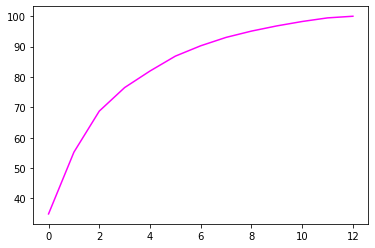

In [72]:
# Variance plot for PCA components obtained 

plt.plot(cum_var,color="magenta")                                

### 4.Hierarchical Clustering

#### creating dendrogram

#### a) for standardized data

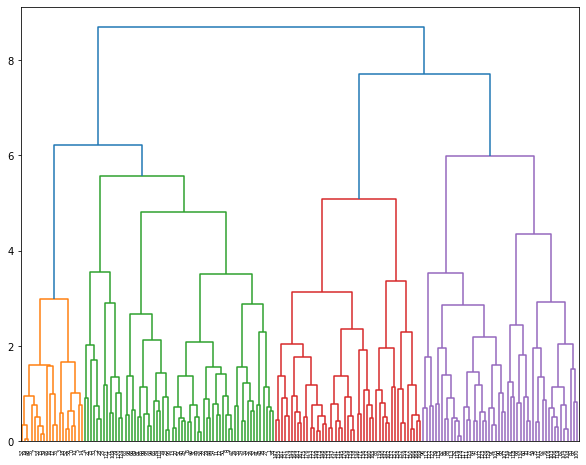

In [75]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(data_s_p.iloc[:,1:], method='complete'))

#### b)for normalised data

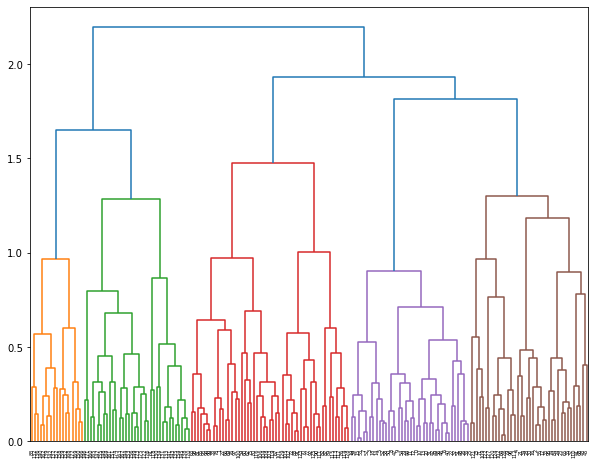

In [76]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(data_n_p.iloc[:,1:], method='complete'))

#### creating clusters

In [77]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
model

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [78]:
y_pred = model.fit_predict(data_n_p.iloc[:,1:])
clusters=pd.DataFrame(y_pred,columns=['Clusters'])
clusters['Clusters'].value_counts()

2    51
0    51
3    38
1    38
Name: Clusters, dtype: int64

In [79]:
data4 = data.copy()
data4['clusterid'] = model.labels_
data4.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,1,14.23,1.71,2.43,16.0,118.0,2.80,3.06,0.28,2.290,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,16.0,100.0,2.65,2.76,0.26,1.280,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.305,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.180,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.70,21.0,118.0,2.80,2.69,0.39,1.820,4.32,1.04,2.93,735,1


### 5. k-means clustering

#### WCSS (finding optimum number of clusters)

#### a)for standardized data

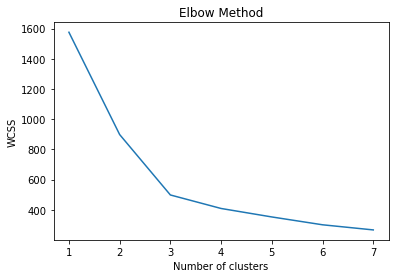

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_s_p.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### b) for normalised data`

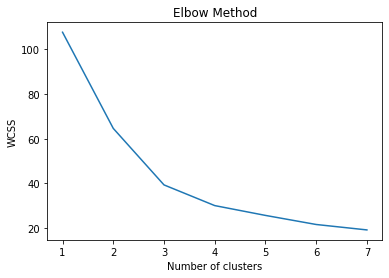

In [81]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_n_p.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
#very slight change in WCSS value from k = 4 to 5
#hence k = 4

#### building cluster (K-means square)

In [83]:
from sklearn.cluster import KMeans
model = KMeans(4, random_state=42)
model.fit(data_n_p.iloc[:,1:])

KMeans(n_clusters=4, random_state=42)

In [84]:
model.labels_

array([0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 1, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [85]:
data5 = data.copy()
data5['clusterid'] = model.labels_
data5.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,1,14.23,1.71,2.43,16.0,118.0,2.80,3.06,0.28,2.290,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,16.0,100.0,2.65,2.76,0.26,1.280,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.305,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.180,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.70,21.0,118.0,2.80,2.69,0.39,1.820,4.32,1.04,2.93,735,2


In [86]:
data5['clusterid'].value_counts()           #three number of clusters

0    52
1    47
3    41
2    38
Name: clusterid, dtype: int64